In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
from pathlib import Path

BASE_DIR = Path.cwd().parent

df = pd.read_csv(
    os.path.join(BASE_DIR, "csv", "admission_predict.csv"), index_col="Serial No."
)

In [2]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [3]:
X = df.drop("Chance of Admit ", axis=1)
y = df["Chance of Admit "]

In [4]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(400, 7)
(400,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

In [7]:
X = pd.DataFrame(X)
# y = pd.DataFrame(y)

In [8]:
y = y.reset_index(drop=True)

y = pd.DataFrame(y)

In [9]:
df = pd.concat([X, y], axis=1)

In [10]:
df

,0,1,2,3,4,5,6,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.92
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.76
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.72
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.80
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.65
...,...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0,0.82
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0,0.84
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0,0.91
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0,0.67


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [12]:
from pycaret.regression import setup, compare_models

setup(data=X_train, target=y_train, session_id=42)

,Description,Value
0,Session id,42
1,Target,6
2,Target type,Regression
3,Original data shape,"(320, 7)"
4,Transformed data shape,"(320, 7)"
5,Transformed train set shape,"(224, 7)"
6,Transformed test set shape,"(96, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [13]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.3363,0.1652,0.3989,0.3218,0.2792,0.3167,0.0030
ridge,Ridge Regression,0.3411,0.1678,0.4035,0.3110,0.2824,0.3220,0.0030
br,Bayesian Ridge,0.3413,0.1690,0.4045,0.3062,0.2825,0.3230,0.0030
et,Extra Trees Regressor,0.3067,0.1688,0.3998,0.3060,0.2822,0.2863,0.0200
lr,Linear Regression,0.3382,0.1693,0.4043,0.3050,0.2813,0.3210,0.2500
huber,Huber Regressor,0.3308,0.1714,0.4050,0.2965,0.2779,0.3196,0.0040
rf,Random Forest Regressor,0.2980,0.1720,0.4008,0.2918,0.2826,0.2775,0.0180
knn,K Neighbors Regressor,0.2898,0.1742,0.4109,0.2852,0.2875,0.2794,0.0060
lightgbm,Light Gradient Boosting Machine,0.3057,0.1825,0.4152,0.2485,0.2868,0.2863,0.0950
ada,AdaBoost Regressor,0.3636,0.1837,0.4242,0.2438,0.3007,0.3296,0.0050


OrthogonalMatchingPursuit()

In [14]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0, random_state=42)

ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [15]:
ridge_model.score(X_test, y_test)

0.8114467327766686

Text(0, 0.5, 'Actual Values')

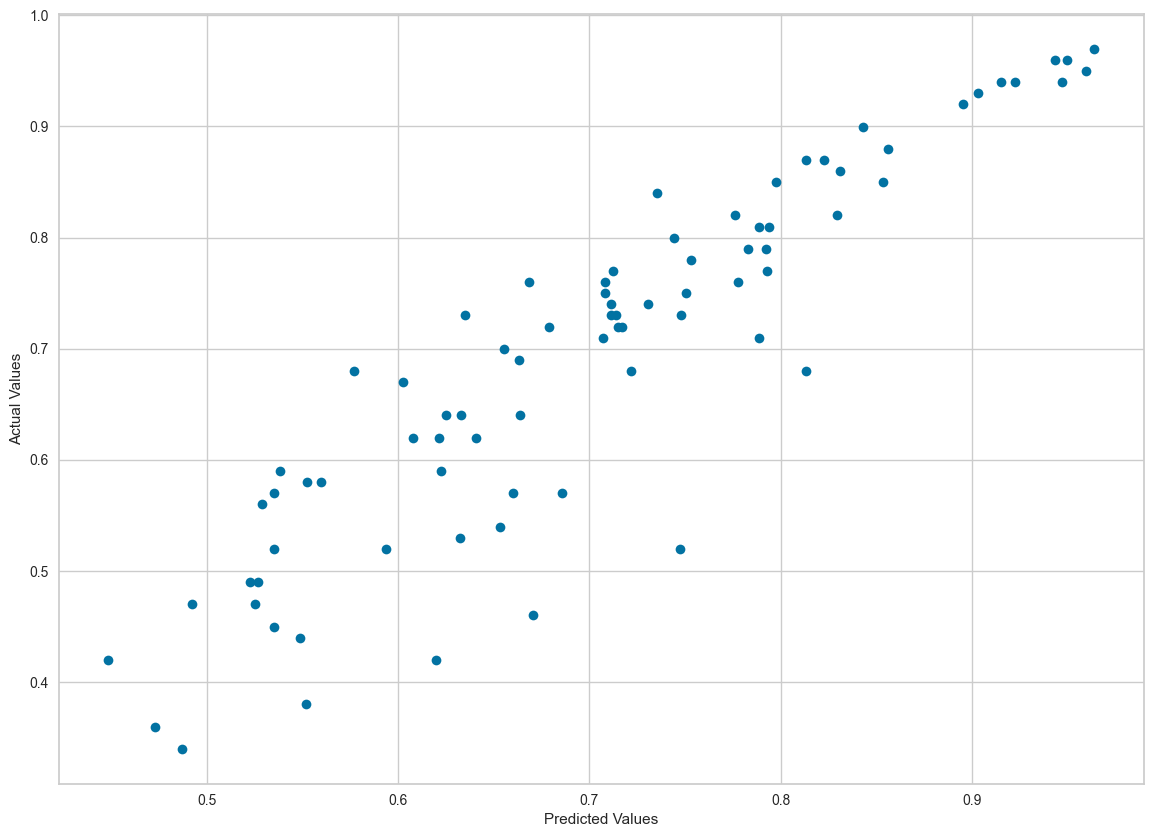

In [16]:
plt.figure(figsize=(14, 10))
plt.plot(y_pred, y_test, "o")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")